# Coffee Sales - Insights & Visualization
The notebook is processing a public Coffee Sales data set, taken from Kaggle. It is located at https://www.kaggle.com/datasets/ihelon/coffee-sales. The dataset contains records of coffee sales from a real-world vending machine. The `.csv` file with all the data is located at [data/data_set.csv](data/data_set.csv)

**Note:** From now on, we will consider that the data set is provided by a client company, that I am working on as a data science consultant

## Business and data visualization context

- **Audience**: The CEO and the Sales Manager of the company
- **Action**: Optimize the company's sales
- **How**:
    - Explore the insights and trends of the data set
    - Explane information in the written document form, utlizing visualization techniques 

#### What data available
Sales of a single coffee vending machine from March 2024 to the end of February 2025. Including:
- Date time, precise to seconds 
- Cash or card is used
- Amount of money spent (in Ukranian currency, hryvnia)
- Coffee drink name

## Data exploration & preprocessing

Firstly, let's import the data set using `pandas` and then get a basic picture of what infromation it contains

In [ ]:
from pathlib import Path

import pandas as pd


CSV_FILE_PATH = Path("data/data_set.csv")
df = pd.read_csv(CSV_FILE_PATH)

In [ ]:
print("Head of the data set:")
print(df.head())

print("\nData info:")
print(df.info(verbose=True))

Now, lets do basic preprocessing and handle potential data quality issues:
- Check `null` values
- Validate and convert the values types in every column
- In the case of the `cash_type` and `coffy_type`, ensure that all the unique values are appropriate
- Make sure that in every row, the `datetime` value aligns with the `date` value

In [ ]:
print("\nMissing values per column:")
print(df.isnull().sum())

So only the `card` column has cell with missing values. We assume that those are the ones, when the `cash_type` is `cash`. We will validate this later

Conver the `date` and `datatime` values to the datetime Pandas type. Then check if there are any corrupted entries.

In [ ]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")

print("\nEntries with invalid 'date' values:")
print(df[df["date"].isnull()])

print("\nEntries with invalid 'datetime' values:")
print(df[df["datetime"].isnull()])

We can see, that all the `date` and `datetime` cells are not corrupted and there are no `null` entries

Conver the `money` column cells to be of a numeric Pandas type. Check if any values are corrupted

In [ ]:
df["money"] = pd.to_numeric(df["money"], errors="coerce")

print("\nEntries with invalid 'money' values:")
print(df[df["money"].isnull()])

Make sure that `cash_type` and `coffee_name` values are adequate

In [ ]:
print("\nUnique values in 'cash_type':")
print(df["cash_type"].unique())

print("\nUnique values in 'coffee_name':")
print(df["coffee_name"].unique())

Check if there are any rows where `date` and `datetime` values are misaligned (not related to the same date)

In [ ]:
misaligned = df[
    pd.to_datetime(df["datetime"], errors="coerce").dt.date
    != pd.to_datetime(df["date"], errors="coerce").dt.date
]

print("Rows with misaligned `date` and `datetime` values:")
print(misaligned)

Before we found out that there are `card` cells with no values. Let's check if all of them are related to the rows where `cash_type` is `cash`

In [ ]:
misaligned = df[df["card"].isnull() & (df["cash_type"] != "cash")]

print("Rows with misaligned `card` and `cash_type` values:")
print(misaligned)

Check how the data frame looks now after the preprocessing

In [35]:
print("Current form of the data")
print(df.info(verbose=True))

Current form of the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3263 non-null   datetime64[ns]
 1   datetime     3263 non-null   datetime64[ns]
 2   cash_type    3263 non-null   object        
 3   card         3174 non-null   object        
 4   money        3263 non-null   float64       
 5   coffee_name  3263 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 153.1+ KB
None


### Conclusion:
We have got the basic understanding of what data we work with, we made a basic preprocessing of it, and made sure that there are no obvious mistakes (corrupted data).

We don't require any special data curation technics Throughout the further steps, we should only keep in mind that `card` cells are null when `cash_type` is `cash`

## Explanatory
Let's go through several interesting insights of the data. Start from importing the required packages and setting a style of the plots

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

### Average Sales Frequency Throughout the Day
Let's analyze, how many sales happen on average an hour. 

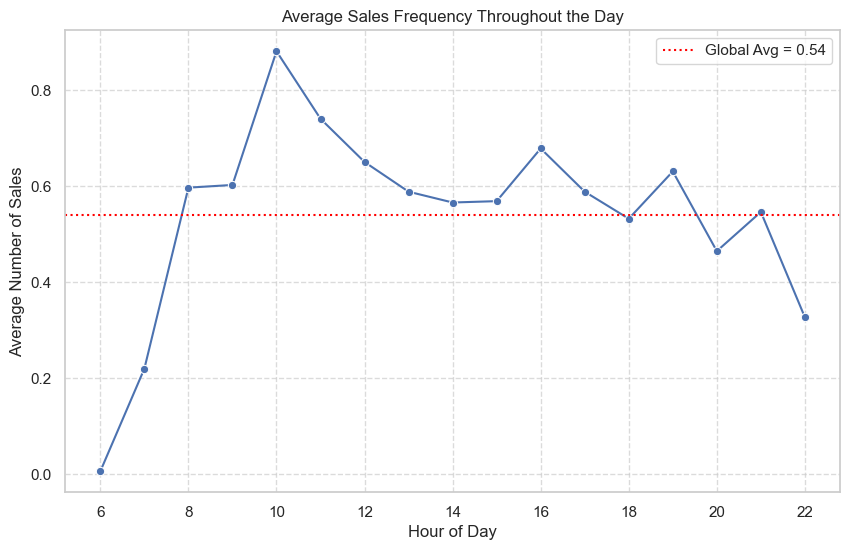

In [64]:
hours_series = df["datetime"].dt.hour
dates_series = df["datetime"].dt.date

sales_counts = hours_series.value_counts().sort_index()
n_days = dates_series.nunique()
avg_sales_per_hour = sales_counts / n_days

# Exclude the night period
avg_sales_per_hour = avg_sales_per_hour[avg_sales_per_hour > 0]

plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_sales_per_hour.index, y=avg_sales_per_hour.values, marker="o")

# Step of 2 hours
plt.xticks(range(min(avg_sales_per_hour.index), max(avg_sales_per_hour.index) + 1, 2))

plt.xlabel("Hour of Day")
plt.ylabel("Average Number of Sales")
plt.title("Average Sales Frequency Throughout the Day")
plt.grid(linestyle="--", alpha=0.7)

global_avg = avg_sales_per_hour.mean()
plt.axhline(
    y=global_avg, color="red", linestyle=":", label=f"Global Avg = {global_avg:.2f}"
)
plt.legend()

plt.show()